In [114]:
# 실습용 라이브러리 로딩

import os
from os.path import join
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import sklearn
import matplotlib.pyplot as plt

## 전처리

In [168]:
#데이터 가져오기
data = pd.read_csv("data/trend_org.csv")

In [169]:
data

,Unnamed: 0,date,category,sex,age,marriage,kids,elem,mid,univ,house
0,0,202005,5,0,6,3,1,3,2,1,1
1,1,202005,4,0,2,3,1,2,2,1,1
2,2,202005,9,1,4,2,2,2,2,1,2
3,3,202005,6,0,4,2,2,2,2,1,1
4,4,202005,9,0,7,3,1,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...
452033,452033,201904,10,0,5,1,2,1,1,1,1
452034,452034,201904,5,0,8,3,1,1,1,1,1
452035,452035,201904,5,1,8,3,1,1,1,1,1
452036,452036,201904,5,0,8,3,1,1,1,1,1


In [170]:
# 2020년 데이터만 불러오기
# 2019년과 2020년의 소비집단 클러스터 특성이 다르게 나타날 수 있어서 2020년만 해봄
data = data[data['date']>202000]

In [171]:
#기혼자만
data = data[data['marriage']==3]

In [172]:
# float형태의 데이터만 불러오기
data = data[['kids','elem','mid','univ','house']]

In [119]:
# 데이터 정규화 - 모든 컬럼에 있는 데이터를 0~1사이의 값으로 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[:] = scaler.fit_transform(data[:])

In [173]:
data.describe()

,kids,elem,mid,univ,house
count,147705.000000,147705.000000,147705.000000,147705.000000,147705.000000
mean,1.372303,1.773061,1.931505,1.349819,1.529752
std,0.577216,0.735054,0.501650,0.500588,0.591385
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,1.000000,1.000000
75%,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000


## 클러스터링

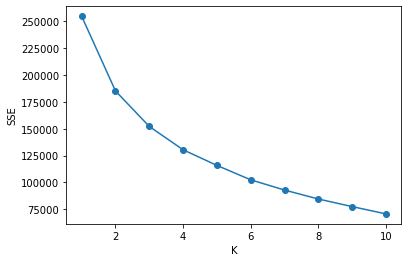

In [174]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(data)

In [175]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [176]:
cluster = kmeans.predict(data)

In [177]:
cluster_id = pd.DataFrame(cluster,columns=["cluster"])

In [178]:
cluster_id

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
147700,0
147701,0
147702,0
147703,0


In [179]:
data = data.reset_index()

In [180]:
data

,index,kids,elem,mid,univ,house
0,0,1,3,2,1,1
1,1,1,2,2,1,1
2,4,1,2,2,2,1
3,6,1,3,2,1,1
4,7,3,1,2,1,2
...,...,...,...,...,...,...
147700,210460,1,2,2,2,1
147701,210461,1,2,2,1,1
147702,210462,1,2,3,2,2
147703,210466,1,2,2,2,1


In [181]:
data = data.drop(data.columns[[0]], axis='columns')

In [182]:
final = pd.concat([data, cluster_id],axis=1)

In [183]:
final

,kids,elem,mid,univ,house,cluster
0,1,3,2,1,1,0
1,1,2,2,1,1,0
2,1,2,2,2,1,0
3,1,3,2,1,1,0
4,3,1,2,1,2,1
...,...,...,...,...,...,...
147700,1,2,2,2,1,0
147701,1,2,2,1,1,0
147702,1,2,3,2,2,0
147703,1,2,2,2,1,0


In [184]:
final.to_excel('cluster_2020.xlsx')